<a href="https://colab.research.google.com/github/MathurTarun06/Image_Classification/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ipython-autotime
# %load_ext autotime  
get_ipython().system('pip install ipython-autotime') 
get_ipython().magic('load_ext autotime')             #command to get the loading time for one specific cell

In [ ]:
'''Datasets: There are four ways to get images to train the model.
	1.Download Manually
	2.Download datasets from kaggle
	3.Build a Image web crawler using programming.
	4.Use python libraries to scrape the images(using bing downloader)'''

In [3]:
!pip install bing-image-downloader

time: 3.54 s (started: 2021-07-31 12:52:36 +00:00)


In [4]:
!mkdir images   #mkdir is command to make directory

time: 116 ms (started: 2021-07-31 12:52:49 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby leather ball",limit=30,output_dir='images',adult_filter_off=True)


In [ ]:
!pip install scikit-image

In [ ]:
!pip install -U cython    #to make scikit work

In [10]:
 #Preprocessing
 #1.Resizing
 #2.Flattening
 
 import os
 import matplotlib.pyplot as plt
 import numpy as np
 from skimage.io import imread           #for reading images
 from skimage.transform import resize   # to make images of same pixel or dimension

 target = []      #output
 images = []      #input
 flat_data = []

 DATADIR = '/content/images'
 Categories = ['leather cricket ball','rugby leather ball','tennis ball' ]

#joining all the categories into 1
 for category in Categories:
   class_num = Categories.index(category)   #Label Encoding the values to make model understand categories easily
   path = os.path.join(DATADIR,category)     #created path to use all the images
   for image in os.listdir(path):    
     image_list = imread(os.path.join(path,image))

    #  print(image_list.shape)
  #  plt.imshow(image_list)
     image_resized = resize(image_list,(150,150,3))    #normalizes data from 0 to 1
     flat_data.append(image_resized.flatten())
     images.append(image_resized)
     target.append(class_num)

 flat_data = np.array(flat_data)
 target = np.array(target)
 images = np.array(images)


time: 14.9 s (started: 2021-07-31 12:58:46 +00:00)


In [11]:
len(flat_data[0])

67500

time: 10.6 ms (started: 2021-07-31 13:01:00 +00:00)


In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 4.21 ms (started: 2021-07-31 13:01:08 +00:00)


<BarContainer object of 3 artists>

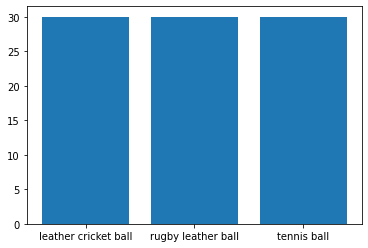

time: 205 ms (started: 2021-07-31 13:01:13 +00:00)


In [13]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [ ]:
!pip install scikit-learn

In [16]:
 #Splitting data
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                  test_size = 0.3,random_state = 109) 

time: 28.6 ms (started: 2021-07-31 13:01:46 +00:00)


In [17]:
 from sklearn.model_selection import GridSearchCV   #Generates all the combinations of a hyperparameter grid
                                                    #to find parameters used in support vectors are proper. SVM need hyper parameters which seperates bw both the categories
 from sklearn import svm

 param_grid = [
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
 ]

 svc = svm.SVC(probability = True)
 clf = GridSearchCV(svc,param_grid)
 clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 6s (started: 2021-07-31 13:01:51 +00:00)


In [18]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 2])

time: 197 ms (started: 2021-07-31 13:04:19 +00:00)


In [19]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 8.16 ms (started: 2021-07-31 13:04:24 +00:00)


In [ ]:
!pip install -U scikit-learn

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

time: 1.73 ms (started: 2021-07-31 13:04:44 +00:00)


In [22]:
accuracy_score(y_pred,y_test)

0.8148148148148148

time: 5.55 ms (started: 2021-07-31 13:05:10 +00:00)


In [23]:
confusion_matrix(y_pred,y_test)

array([[7, 0, 0],
       [1, 8, 1],
       [0, 3, 7]])

time: 9.26 ms (started: 2021-07-31 13:05:17 +00:00)


In [24]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('image_classification_model.p','wb')) #writing byte

time: 57 ms (started: 2021-07-31 13:05:28 +00:00)


In [25]:

model = pickle.load(open('image_classification_model.p','rb')) #reading byte

time: 39.4 ms (started: 2021-07-31 13:05:35 +00:00)


Enter your URLhttps://5.imimg.com/data5/CQ/ML/MY-38181931/tennis-ball-500x500.jpg
(500, 500, 3)
 Predicted Output: tennis ball


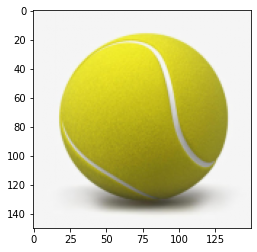

time: 5.14 s (started: 2021-07-31 13:11:36 +00:00)


In [30]:
# Testing a new image
flat_data = []
url = input('Enter your URL')
image = imread(url)
image_resized = resize(image,(150,150,3))
flat_data.append(image_resized.flatten())
flat_data = np.array(flat_data)
print(image.shape)
plt.imshow(image_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f' Predicted Output: {y_out}')
#https://upload.wikimedia.org/wikipedia/commons/c/c7/Roses_Boutons_FR_2012.jpg

In [ ]:
!pip install streamlit

!pip install pyngrok



In [74]:
from pyngrok import ngrok

time: 1.14 ms (started: 2021-07-30 18:34:15 +00:00)


In [82]:
%%writefile classifier_app.py
import streamlit as st
st.title('Image Classifier using Machine Learning') 

Overwriting classifier_app.py
time: 7.07 ms (started: 2021-07-30 20:06:39 +00:00)


In [ ]:
# !nohup streamlit run classifier_app.py           #The major Problem
# # !nohup streamlit run --server.port 80 classifier_app.py >/dev/null #nohup makes it run in background
# url = ngrok.connect(port='80')
# url



nohup: ignoring input and appending output to 'nohup.out'
